# Ejercicio de Regresión

## EDA - Análisis Exploratorio de Datos

### Cargar datos y librerías

In [1]:
# Librerias

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import numpy as np

import mglearn
import matplotlib

In [2]:
datawind = pd.read_csv('C:/ProgramasML/ML/Ejemplosclase/DatosParcial/data_treino_dv_df_2000_2010.csv')

### Exploración y limpieza de datos

Iniciamos la exploración con un overview de los datos

In [3]:
datawind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [4]:
datawind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

- Cambiar el nombre de las columnas por unos más cortos para que sea manejable durante el analisis

In [5]:
nuevos_nombres = ['Hora',
                  'Direccion',
                  'Velocidad',
                  'Humedmax',
                  'Humedmin',
                  'Tempmax',
                  'Tempmin',
                  'Humedad',
                  'Presion',
                  'Precipitacion',
                  'Rafagamaxviento',
                  'Presionmax',
                  'Presionmin',]  # Lista de nuevos nombres en el mismo orden que las columnas existentes
datawind.columns = nuevos_nombres

In [6]:
datawind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hora             87693 non-null  object 
 1   Direccion        87693 non-null  float64
 2   Velocidad        87693 non-null  float64
 3   Humedmax         87693 non-null  float64
 4   Humedmin         87693 non-null  float64
 5   Tempmax          87693 non-null  float64
 6   Tempmin          87693 non-null  float64
 7   Humedad          87693 non-null  float64
 8   Presion          87693 non-null  float64
 9   Precipitacion    87693 non-null  float64
 10  Rafagamaxviento  87693 non-null  float64
 11  Presionmax       87693 non-null  float64
 12  Presionmin       87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


Conjunto de datos de 87.693 muestras y 13 columnas, 12 de las cuales corresponden a valores reales y una object, que cambiaremos a continuación debido a que corresponden a valores tipo hora.

In [7]:
# Convertir la columna 'hora' a tipo datetime y usar solo la hora, sin tener en cuenta los minutos. 
datawind['Hora'] = pd.to_datetime(datawind['Hora'], format='%H:%M').dt.hour

- Comprobación de duplicados

In [8]:
# Verificar filas duplicadas
duplicados = datawind[datawind.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
Empty DataFrame
Columns: [Hora, Direccion, Velocidad, Humedmax, Humedmin, Tempmax, Tempmin, Humedad, Presion, Precipitacion, Rafagamaxviento, Presionmax, Presionmin]
Index: []


- Comprobar datos nulos o faltantes

In [9]:
valores_nulos_por_columna = datawind.isnull().sum()
print(valores_nulos_por_columna)

Hora               0
Direccion          0
Velocidad          0
Humedmax           0
Humedmin           0
Tempmax            0
Tempmin            0
Humedad            0
Presion            0
Precipitacion      0
Rafagamaxviento    0
Presionmax         0
Presionmin         0
dtype: int64


La base de datos no tiene valores nulos, por ende, podemos seguir con el análisis sin hacer ninguna otra modificación. 

In [10]:
datawind.describe().T

,count,mean,std,min,25%,50%,75%,max
Hora,87693.0,11.506437,6.932300,0.0,5.000000,12.000000,18.000000,23.0
Direccion,87693.0,0.405810,0.686247,-1.0,-0.156434,0.788011,0.970296,1.0
Velocidad,87693.0,2.466192,1.313968,0.0,1.500000,2.400000,3.400000,10.0
Humedmax,87693.0,69.058465,19.640222,12.0,54.000000,72.000000,87.000000,100.0
Humedmin,87693.0,63.176194,20.166336,10.0,48.000000,64.000000,80.000000,98.0
Tempmax,87693.0,21.921264,3.721386,9.2,19.200000,21.400000,24.700000,35.3
Tempmin,87693.0,20.684570,3.513744,8.4,18.400000,20.200000,23.100000,34.4
Humedad,87693.0,66.146682,19.992327,10.0,51.000000,68.000000,84.000000,99.0
Presion,87693.0,887.251925,4.012404,863.4,885.300000,887.200000,889.100000,1023.5
Precipitacion,87693.0,0.160907,1.307515,0.0,0.000000,0.000000,0.000000,70.8


- Separar el conjunto de datos en data y target

In [11]:
# Definimos las columnas "data" y "target"
data_col = ['Hora',
'Direccion',
'Humedmax',
'Humedmin',
'Tempmax',
'Tempmin',
'Humedad',
'Presion',
'Precipitacion',
'Rafagamaxviento',
'Presionmax',
'Presionmin',
]
target_col = 'Velocidad'

data = datawind[data_col]
target = datawind[target_col]

### Visualización y análisis de datos

- Análisis Univariado 

Graficar histograma y diagrama de caja y bigote para cada variable.

Column:  Hora
Skew: -0.0
Kurtosis:  -1.21


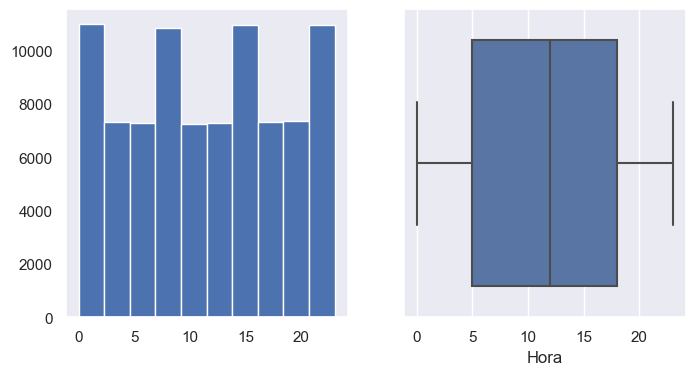

Column:  Direccion
Skew: -0.86
Kurtosis:  -0.82


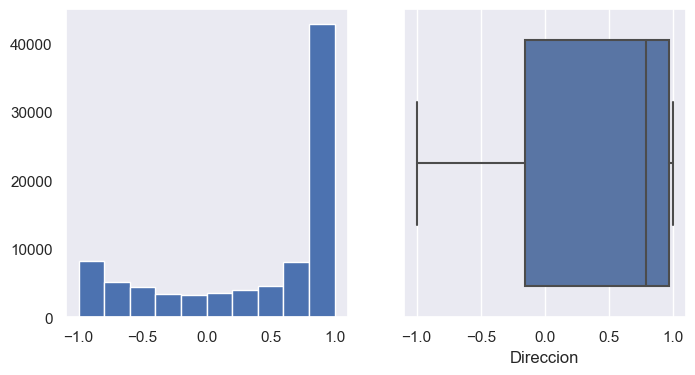

Column:  Humedmax
Skew: -0.48
Kurtosis:  -0.78


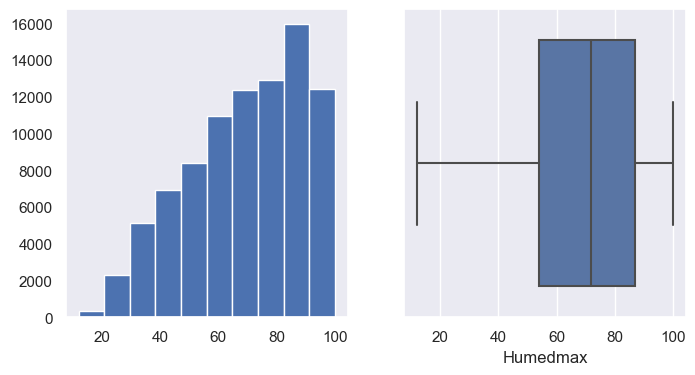

Column:  Humedmin
Skew: -0.23
Kurtosis:  -0.96


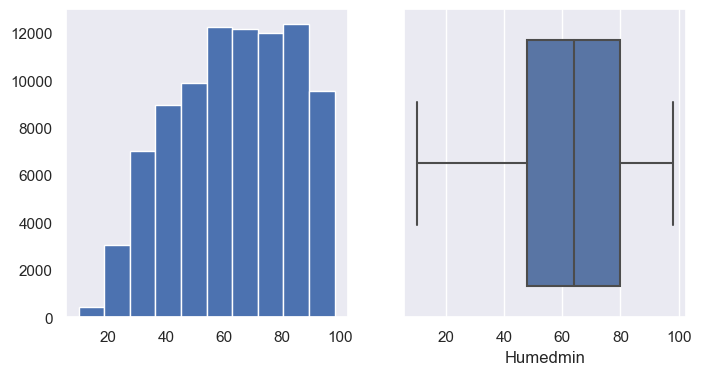

Column:  Tempmax
Skew: 0.26
Kurtosis:  -0.42


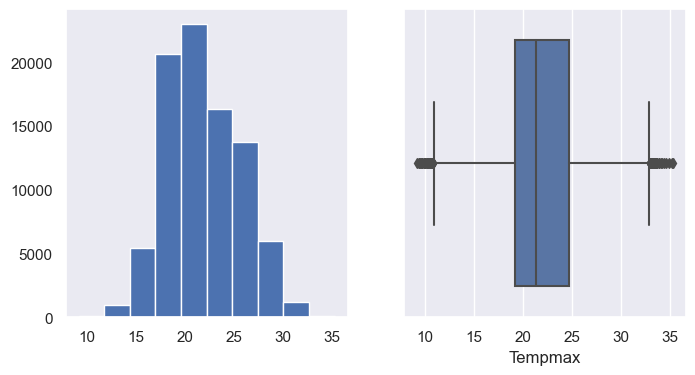

Column:  Tempmin
Skew: 0.24
Kurtosis:  -0.12


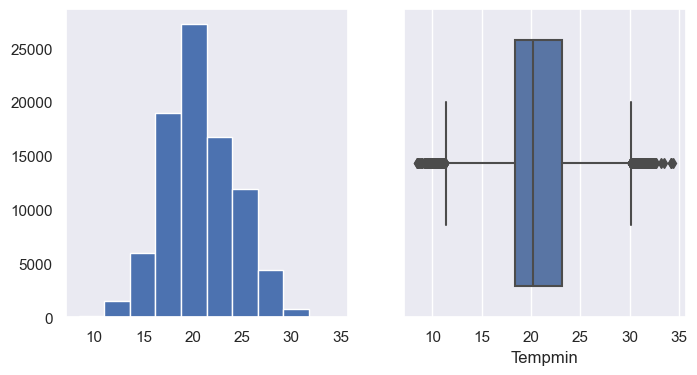

Column:  Humedad
Skew: -0.35
Kurtosis:  -0.89


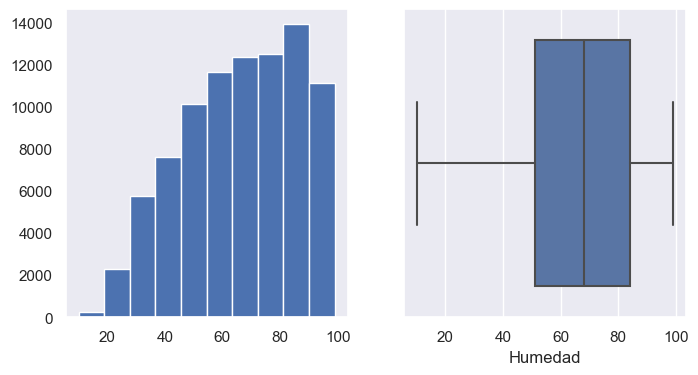

Column:  Presion
Skew: 6.18
Kurtosis:  179.64


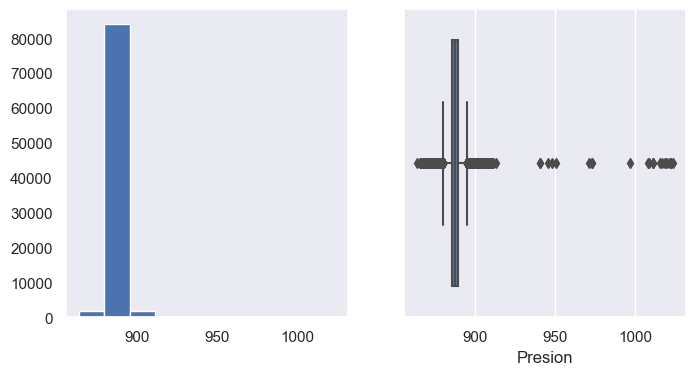

Column:  Precipitacion
Skew: 17.65
Kurtosis:  476.4


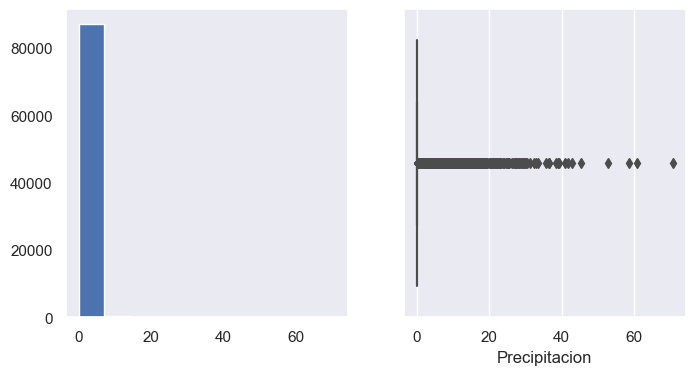

Column:  Rafagamaxviento
Skew: 0.41
Kurtosis:  0.11


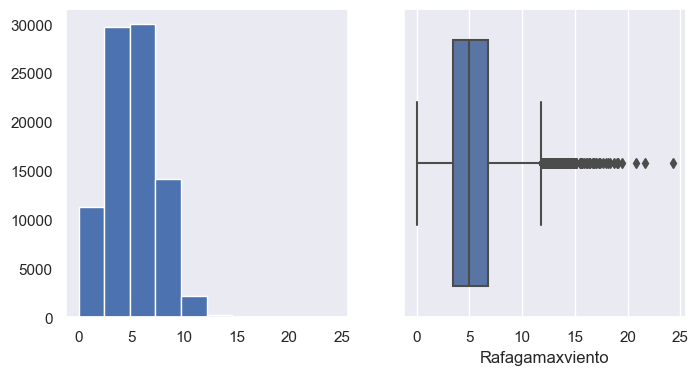

Column:  Presionmax
Skew: 1.02
Kurtosis:  5.82


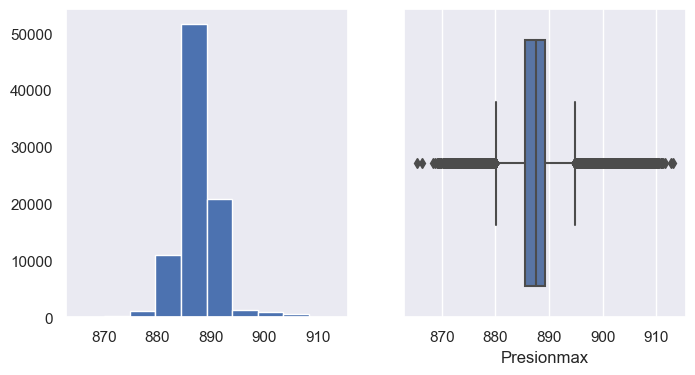

Column:  Presionmin
Skew: 0.33
Kurtosis:  4.91


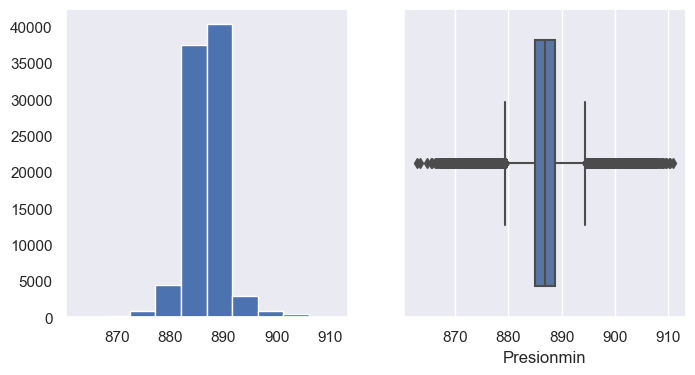

In [12]:
sns.set(font_scale=1)
for col in data_col:
    print('Column: ', col)
    print('Skew:', round(datawind[col].skew(), 2))
    print('Kurtosis: ', round(datawind[col].kurtosis(), 2))
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    datawind[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=datawind[col])
    plt.show()

- Análisis de cada variable:
    - Direccion: Distribución sesgada hacia la izquierda, es decir, tiene mayor peso en la cola derecha de la distribución y cola menos gruesa que la normal.
    - Humedmax: Distribución sesgada hacia la izquierda, es decir, tiene mayor peso en la cola derecha de la distribución y cola menos gruesa que la normal.
    - Humedmin: Distribución levemente sesgada hacia la izquierda, es decir, tiene mayor peso en la cola derecha de la distribución y cola menos gruesa que la normal, sin embargo, es evidente que está menos sesgada que la humedad máxima. 
    - Tempmax: Distribución levemente sesgada hacia la derecha, es decir, tiene mayor peso en la cola izquierda de la distribución y cola menos gruesa que la normal.
    - Tempmin: Distribución levemente sesgada hacia la izquierda, es decir, tiene mayor peso en la cola derecha de la distribución y cola menos gruesa que la normal, sin embargo, es evidente que el sesgo es similar al de la temperatura máxima.
    - Humedad: Distribución levemente sesgada hacia la izquierda, es decir, tiene mayor peso en la cola derecha de la distribución y cola menos gruesa que la normal.
    - Presion: Distribución con gran sesgo hacia la derecha y cola más gruesa que la normal, es decir, presenta muchos datos atípicos.
    - Precipitacion: Distribución con gran sesgo hacia la derecha y cola más gruesa que la normal, es decir, presenta un gran número de datos atípicos.
    - Rafagamaxviento: Distribución levemente sesgada hacia la derecha, es decir, tiene mayor peso en la cola izquierda de la distribución y cola menos gruesa que la normal.
    - Presionmax: Distribución levemente sesgada hacia la derecha, es decir, tiene mayor peso en la cola izquierda de la distribución y cola más gruesa que la normal, muchos datos atípicos, en este caso en ambas colas.
    - Presionmin: Distribución levemente sesgada hacia la derecha, es decir, tiene mayor peso en la cola izquierda de la distribución y cola más gruesa que la normal, muchos datos atípicos, en este caso en ambas colas.


Escalar los datos

Del análisis univariable también podemos evidenciar que los datos de presión, presión máxima y presión minina se encuentran en una escala de valores muy diferente a las demás variables, por ello, a continuación, se hará una transformación logarítmica para ayudar en la normalización, por lo que esta variable puede mantener la escala estándar con otras variables

In [13]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [14]:
log_transform(data,['Presion','Presionmax','Presionmin'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hora             87693 non-null  int32  
 1   Direccion        87693 non-null  float64
 2   Humedmax         87693 non-null  float64
 3   Humedmin         87693 non-null  float64
 4   Tempmax          87693 non-null  float64
 5   Tempmin          87693 non-null  float64
 6   Humedad          87693 non-null  float64
 7   Presion          87693 non-null  float64
 8   Precipitacion    87693 non-null  float64
 9   Rafagamaxviento  87693 non-null  float64
 10  Presionmax       87693 non-null  float64
 11  Presionmin       87693 non-null  float64
 12  Presion_log      87693 non-null  float64
 13  Presionmax_log   87693 non-null  float64
 14  Presionmin_log   87693 non-null  float64
dtypes: float64(14), int32(1)
memory usage: 9.7 MB


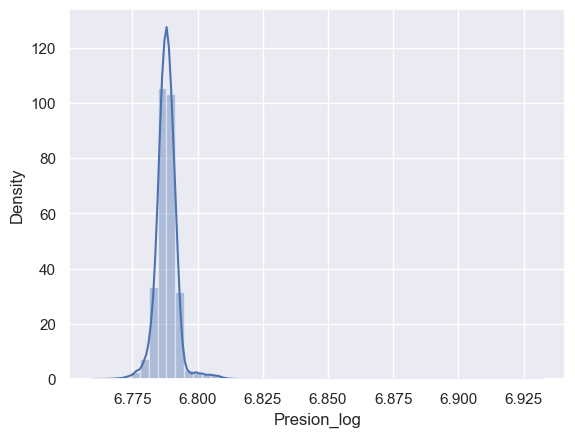

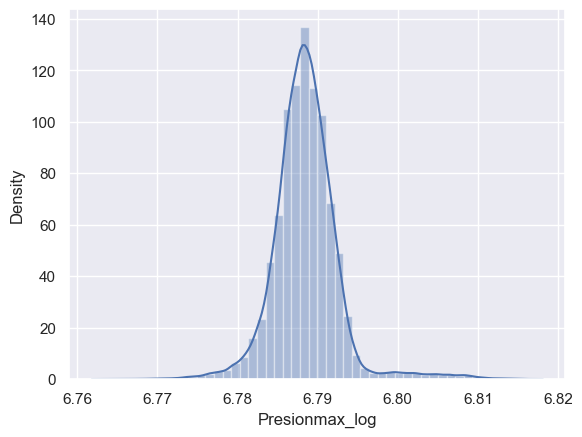

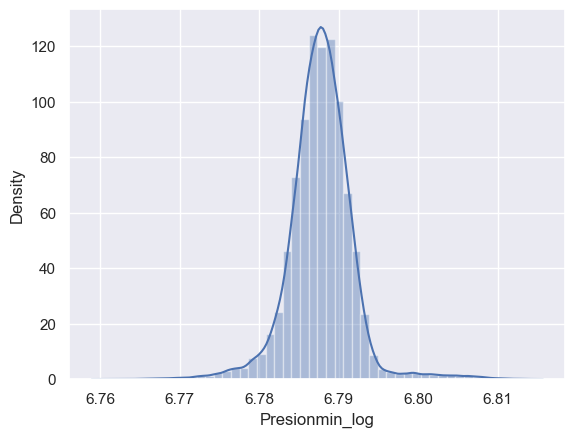

In [15]:
for i in ['Presion_log','Presionmax_log','Presionmin_log']:
    sns.distplot(data[i], axlabel=i)
    plt.show()
    

- Análisis bivariado

Graficar todas las características vs nuestra variable de interés.

In [16]:
# Función para graficar
def scatter_regplot(data, strx, stry):
    sns.set(font_scale=1.1)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    sns.scatterplot(data=data, x=strx, y=stry, ax=ax[0])
    sns.regplot(data=data, x=strx, y=stry, ax=ax[1],  line_kws={"color": "green"});
    fig.suptitle('Relación entre %s y Velocidad'%col)

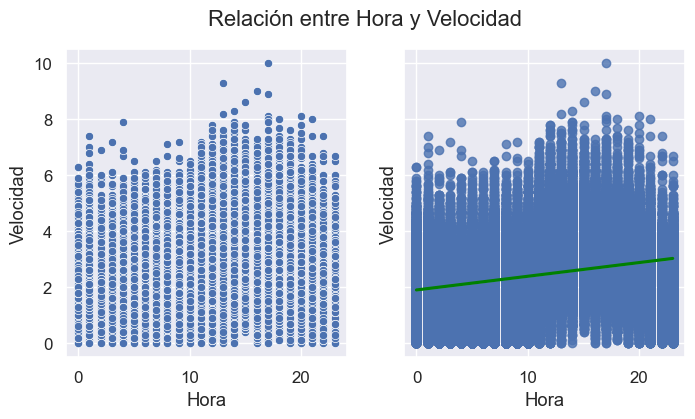

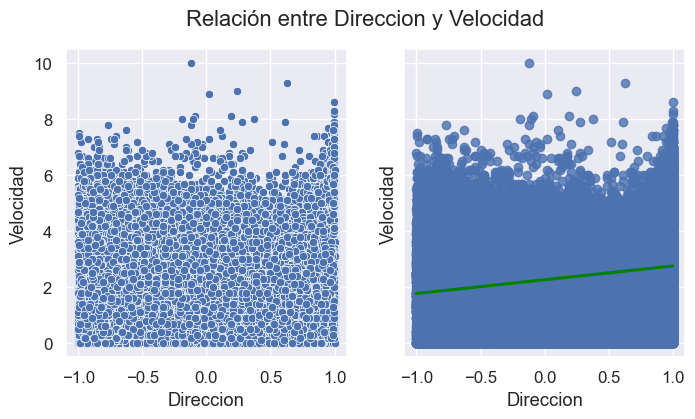

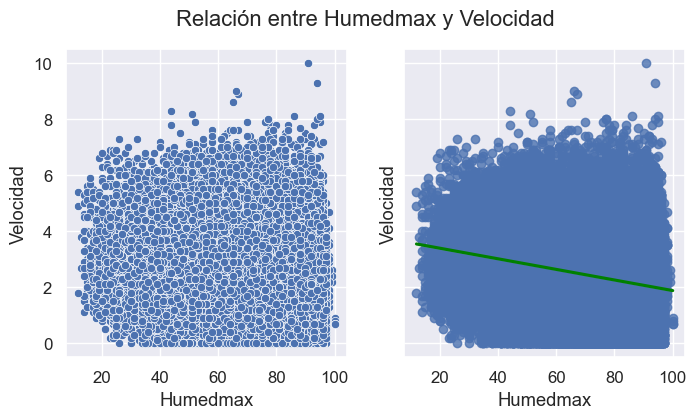

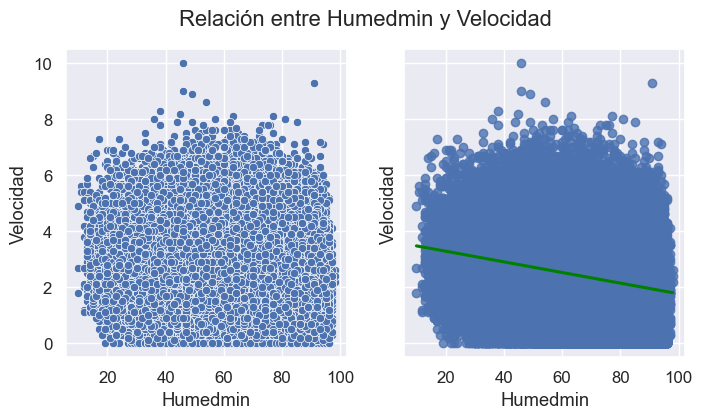

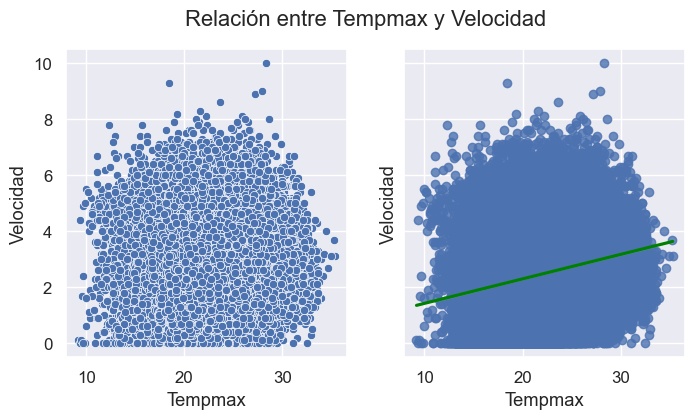

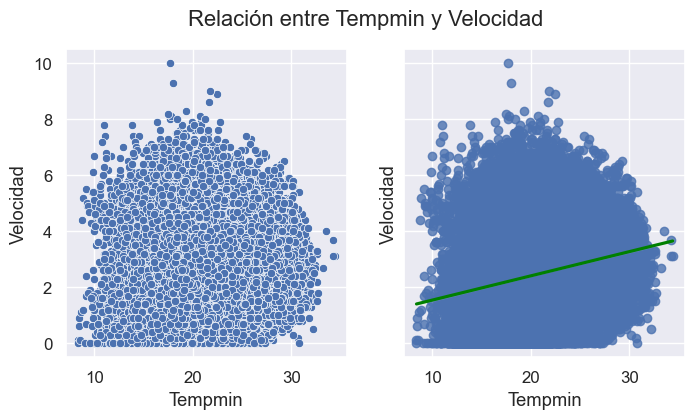

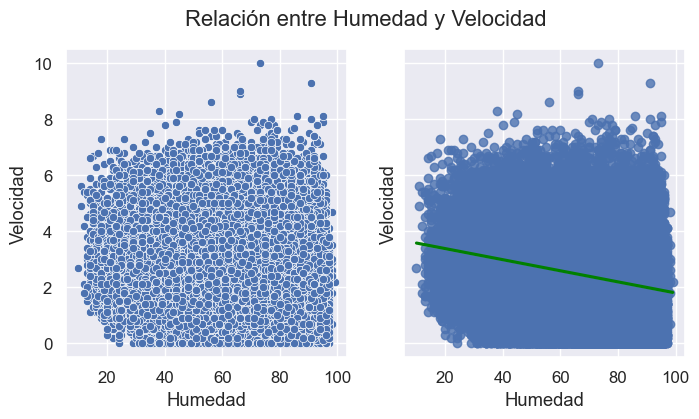

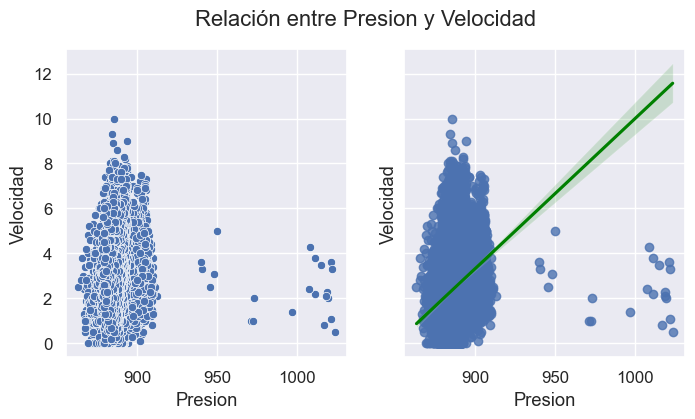

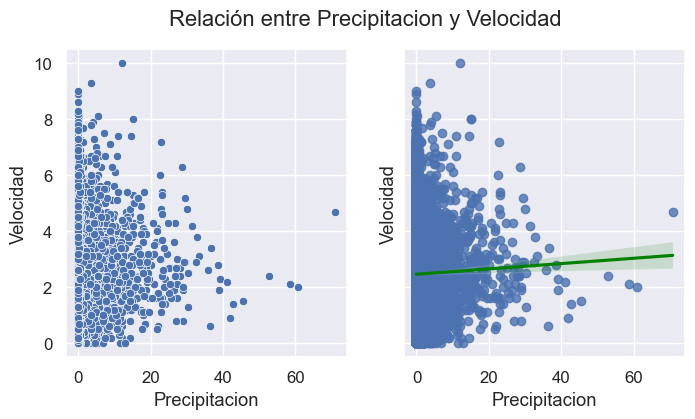

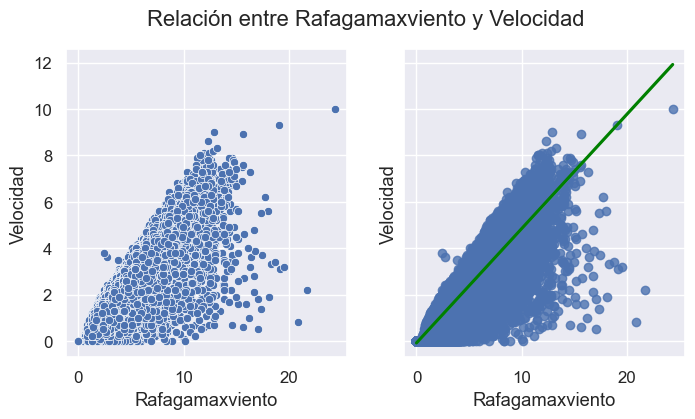

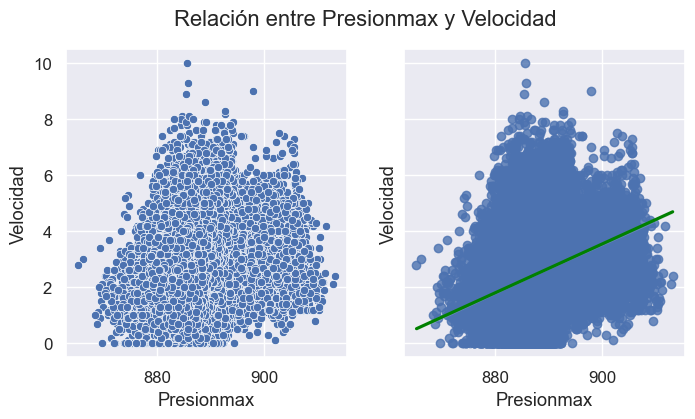

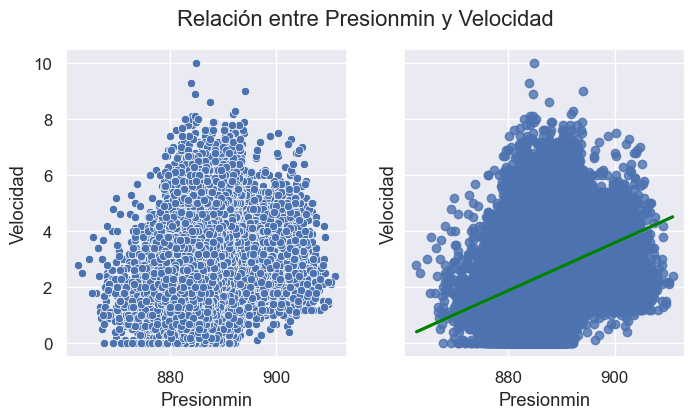

In [17]:
for col in data_col:
    scatter_regplot(datawind,col,'Velocidad')

De las gráficas anteriores podemos extraer que las relaciones más notorias con la velocidad se dan con presión atmosférica, presión atmosférica máxima hora anterior, presión atmosférica mínima hora anterior y máxima ráfaga de viento. 

- Análisis de correlación

Realizar mapa de calor para determinar la correlación entre las varibles. 

In [18]:
matplotlib.rc_file_defaults()

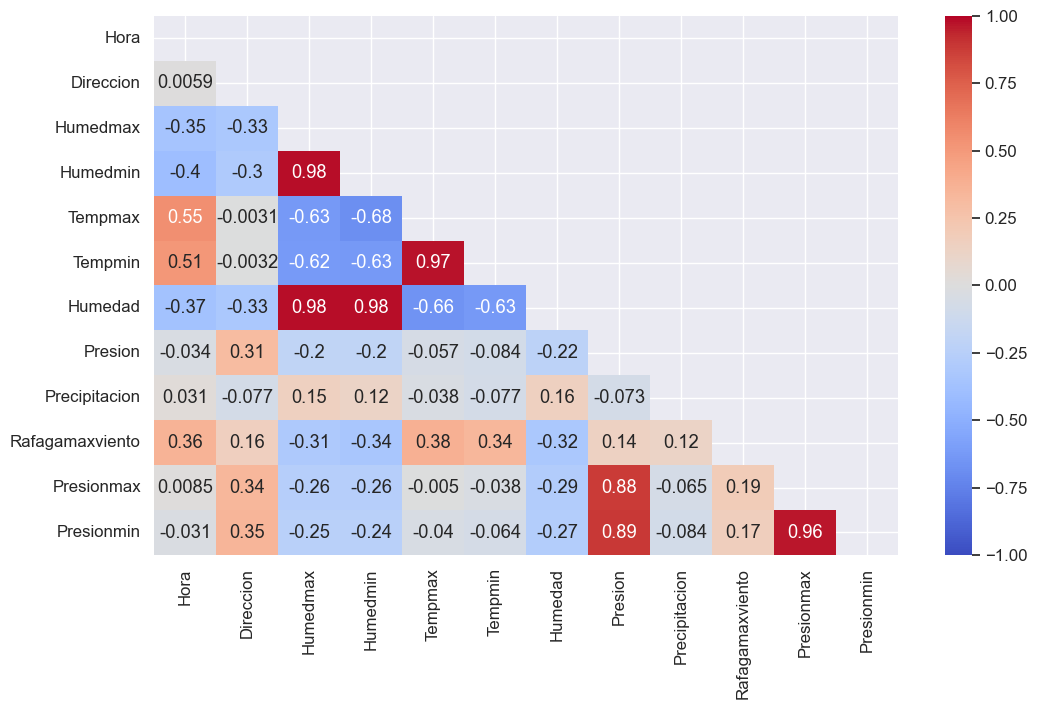

In [19]:
sns.set(font_scale=1.1)
data_to_plot = data.drop(['Presion_log', 'Presionmax_log', 'Presionmin_log'], axis=1)
corr_matrix = data_to_plot.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm", mask=mask)
plt.show()

- Análisis del mapa de calor
    - Relación entre humedad relativa, humedad relativa máxima de la hora anterior y humedad relativa mínima de la hora anterior: Al igual que la presión, la humedad relativa es una característica que no cambia significativamente entre una hora y otra, por ende, se entiende la relación entre ellas, pero a diferencia de la presión la relación de las variables de humedad es mucho más fuerte, casi 1, por ende, en este caso eliminaremos de nuestro análisis las variables de 'Humedmin' y 'Humedmax'.

In [20]:
# Lista de las columnas que deseas eliminar
columna_a_eliminar = ['Humedmin','Humedmax']

# Eliminar las columnas especificadas
datawind = datawind.drop(columns=columna_a_eliminar)

In [21]:
datawind.describe()

,Hora,Direccion,Velocidad,Tempmax,Tempmin,Humedad,Presion,Precipitacion,Rafagamaxviento,Presionmax,Presionmin
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,11.506437,0.405810,2.466192,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,6.932300,0.686247,1.313968,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,0.000000,-1.000000,0.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,5.000000,-0.156434,1.500000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,12.000000,0.788011,2.400000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,18.000000,0.970296,3.400000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,23.000000,1.000000,10.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


## Modelos de Regresión

In [22]:

# Librerias para modelos

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from xgboost import XGBRegressor

from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

```{note}
A partir de este momento se utilizarán solo 8.760 datos (aproximadamente 1 año) debido al alto costo computacional que requiere hacer la creación de los modelos con los 87.693 datos.
```

In [23]:
import math

cant_filas = 7300 # Número de datos que usaremos para entrenar los modelos
porcentaje = 0.70
cant_filas_ent = math.floor(cant_filas * porcentaje)

datawind = datawind.iloc[:cant_filas] # Dejar la cantidad de filas en el df que se desea

X = datawind.drop('Velocidad',axis=1)
y = datawind['Velocidad']

X_train = X[:cant_filas_ent]
X_test = X[cant_filas_ent+1:]
y_train = y[:cant_filas_ent]
y_test = y[cant_filas_ent+1:]

In [24]:
def splits_wind(X, y, inicio, step):
    size = len(X)
    fin = inicio

    while fin <= size:
        train_indices = list(range(0, fin))
        val_indices = list(range(fin, min(fin + inicio, size)))
        yield train_indices, val_indices  # Devuelve índices de train y test
        fin += step

In [25]:
def calcular_metricas(X_trainval, y_trainval, X_test, y_test, best_model):

    # Realizar predicciones en el conjunto de entrenamiento (X_trainval)
    y_pred_train = best_model.predict(X_trainval)

    # Realizar predicciones en el conjunto de prueba (X_test)
    y_pred_test = best_model.predict(X_test)

    # Calcular las métricas utilizando los datos de entrenamiento y validación
    mape_tra = mean_absolute_percentage_error(y_trainval, y_pred_train)
    rmse_tra = np.sqrt(mean_squared_error(y_trainval, y_pred_train))
    r2_tra = r2_score(y_trainval, y_pred_train)

    # Calcular las métricas utilizando los datos de prueba (X_test, y_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    return mape_tra, rmse_tra, r2_tra, mape_test, rmse_test, r2_test

### Modelo KNN

In [26]:
model = KNeighborsRegressor()

# Definir los parámetros para buscar utilizando GridSearchCV
param_grid = {
        'n_neighbors': [51, 81, 91, 101],
        'weights': ['distance', 'uniform'],
        'p': [1, 2]
    }

# Realizar una búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(model, param_grid, cv=splits_wind(X_train, y_train, 24, 24), scoring=mean_squared_error, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

mape_knnt, rmse_knnt, r2_knnt, mape_knn, rmse_knn, r2_knn = calcular_metricas(X_train, y_train, X_test, y_test, best_model)

# Imprimir las métricas
print(f'MAPE en el conjunto de entrenamiento: {mape_knnt}')
print(f'RMSE en el conjunto de entrenamiento: {rmse_knnt}')
print(f'R^2 en el conjunto de entrenamiento: {r2_knnt}')
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Imprimir las métricas
print(f'MAPE en el conjunto de prueba: {mape_knn}')
print(f'RMSE en el conjunto de prueba: {rmse_knn}')
print(f'R^2 en el conjunto de prueba: {r2_knn}')



Fitting 212 folds for each of 16 candidates, totalling 3392 fits


MAPE en el conjunto de entrenamiento: 0.0
RMSE en el conjunto de entrenamiento: 0.0
R^2 en el conjunto de entrenamiento: 1.0
Mejores parámetros encontrados:  {'n_neighbors': 51, 'p': 1, 'weights': 'distance'}
MAPE en el conjunto de prueba: 311369404475400.25
RMSE en el conjunto de prueba: 0.9215941717124131
R^2 en el conjunto de prueba: 0.5607863422995658


### Modelo Ridge

In [27]:
# Definir el modelo
model = Ridge()

# Define los parámetros para buscar utilizando GridSearchCV
param_grid = {
    'alpha': [0.001, 0.02, 0.1, 1.0, 10, 100],
    'solver': ['auto']
}

# Realizar una búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(model, param_grid, cv=splits_wind(X_train, y_train, 24, 24), scoring=mean_squared_error, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

mape_ridget, rmse_ridget, r2_ridget, mape_ridge, rmse_ridge, r2_ridge = calcular_metricas(X_train, y_train, X_test, y_test, best_model)

# Imprimir las métricas
print(f'MAPE en el conjunto de entrenamiento: {mape_ridget}')
print(f'RMSE en el conjunto de entrenamiento: {rmse_ridget}')
print(f'R^2 en el conjunto de entrenamiento: {r2_ridget}')
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Imprimir las métricas
print(f'MAPE en el conjunto de prueba: {mape_ridge}')
print(f'RMSE en el conjunto de prueba: {rmse_ridge}')
print(f'R^2 en el conjunto de prueba: {r2_ridge}')

Fitting 212 folds for each of 6 candidates, totalling 1272 fits


MAPE en el conjunto de entrenamiento: 54101653490079.34
RMSE en el conjunto de entrenamiento: 0.6020707470420873
R^2 en el conjunto de entrenamiento: 0.7915786356994238
Mejores parámetros encontrados:  {'alpha': 0.001, 'solver': 'auto'}
MAPE en el conjunto de prueba: 171485320455185.38
RMSE en el conjunto de prueba: 0.7054039204880388
R^2 en el conjunto de prueba: 0.742680833842745


### Modelo Lasso

In [28]:
# Definir el modelo
model = Lasso()

# Definir los parámetros para buscar utilizando GridSearchCV
param_grid = {
    'alpha': [0.1, 1.0, 10, 100],
    'fit_intercept': [True, False],
}

# Realizar una búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(model, param_grid, cv=splits_wind(X_train, y_train, 24, 24), scoring=mean_squared_error, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

mape_lassot, rmse_lassot, r2_lassot, mape_lasso, rmse_lasso, r2_lasso = calcular_metricas(X_train, y_train, X_test, y_test, best_model)

# Imprimir las métricas
print(f'MAPE en el conjunto de entrenamiento: {mape_lassot}')
print(f'RMSE en el conjunto de entrenamiento: {rmse_lassot}')
print(f'R^2 en el conjunto de entrenamiento: {r2_lassot}')
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Imprimir las métricas
print(f'MAPE en el conjunto de prueba: {mape_lasso}')
print(f'RMSE en el conjunto de prueba: {rmse_lasso}')
print(f'R^2 en el conjunto de prueba: {r2_lasso}')

Fitting 212 folds for each of 8 candidates, totalling 1696 fits


MAPE en el conjunto de entrenamiento: 62546370116911.61
RMSE en el conjunto de entrenamiento: 0.6243177075922351
R^2 en el conjunto de entrenamiento: 0.7758914181498016
Mejores parámetros encontrados:  {'alpha': 0.1, 'fit_intercept': True}
MAPE en el conjunto de prueba: 188672605646519.06
RMSE en el conjunto de prueba: 0.7349408202271542
R^2 en el conjunto de prueba: 0.7206805766837543


### Modelo XGBoots

In [29]:
# Definir el modelo
model = XGBRegressor()

# Definir los parámetros para buscar utilizando GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 5]
 }

# Realizar una búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(model, param_grid, cv=splits_wind(X_train, y_train, 24, 24), scoring=mean_squared_error, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

mape_xgboostt, rmse_xgboostt, r2_xgboostt, mape_xgboost, rmse_xgboost, r2_xgboost = calcular_metricas(X_train, y_train, X_test, y_test, best_model)

# Imprimir las métricas
print(f'MAPE en el conjunto de entrenamiento: {mape_xgboostt}')
print(f'RMSE en el conjunto de entrenamiento: {rmse_xgboostt}')
print(f'R^2 en el conjunto de entrenamiento: {r2_xgboostt}')
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Imprimir las métricas
print(f'MAPE en el conjunto de prueba: {mape_xgboost}')
print(f'RMSE en el conjunto de prueba: {rmse_xgboost}')
print(f'R^2 en el conjunto de prueba: {r2_xgboost}')

Fitting 212 folds for each of 12 candidates, totalling 2544 fits


MAPE en el conjunto de entrenamiento: 97800481976716.4
RMSE en el conjunto de entrenamiento: 0.7203623489917201
R^2 en el conjunto de entrenamiento: 0.7016340958835513
Mejores parámetros encontrados:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
MAPE en el conjunto de prueba: 342262495238115.6
RMSE en el conjunto de prueba: 0.8373601060025454
R^2 en el conjunto de prueba: 0.6374057360019267


### Modelo SVM

In [30]:
# Definir el modelo
model = SVR()

# Definir los parámetros para buscar utilizando GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1.0, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Realizar una búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(model, param_grid, cv=splits_wind(X_train, y_train, 24, 24), scoring=mean_squared_error, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

mape_svmt, rmse_svmt, r2_svmt, mape_svm, rmse_svm, r2_svm = calcular_metricas(X_train, y_train, X_test, y_test, best_model)

# Imprimir las métricas
print(f'MAPE en el conjunto de entrenamiento: {mape_svmt}')
print(f'RMSE en el conjunto de entrenamiento: {rmse_svmt}')
print(f'R^2 en el conjunto de entrenamiento: {r2_svmt}')
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Imprimir las métricas
print(f'MAPE en el conjunto de prueba: {mape_svm}')
print(f'RMSE en el conjunto de prueba: {rmse_svm}')
print(f'R^2 en el conjunto de prueba: {r2_svm}')


Fitting 212 folds for each of 27 candidates, totalling 5724 fits


MAPE en el conjunto de entrenamiento: 54763544085556.266
RMSE en el conjunto de entrenamiento: 0.6060141806875944
R^2 en el conjunto de entrenamiento: 0.7888394644484431
Mejores parámetros encontrados:  {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
MAPE en el conjunto de prueba: 172303408035097.03
RMSE en el conjunto de prueba: 0.7218470638812275
R^2 en el conjunto de prueba: 0.7305446654832126


### Modelo MLP

In [31]:
# Definir el modelo
model = MLPRegressor()

# Definir los parámetros para buscar utilizando GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10, 10), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [ 0.01, 1, 10],
    #'learning_rate': ['adaptive']
}

# Realizar una búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(model, param_grid, cv=splits_wind(X_train, y_train, 24, 24), scoring=mean_squared_error, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

mape_mlpt, rmse_mlpt, r2_mlpt, mape_mlp, rmse_mlp, r2_mlp = calcular_metricas(X_train, y_train, X_test, y_test, best_model)

# Imprimir las métricas
print(f'MAPE en el conjunto de entrenamiento: {mape_mlpt}')
print(f'RMSE en el conjunto de entrenamiento: {rmse_mlpt}')
print(f'R^2 en el conjunto de entrenamiento: {r2_mlpt}')
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Imprimir las métricas
print(f'MAPE en el conjunto de prueba: {mape_mlp}')
print(f'RMSE en el conjunto de prueba: {rmse_mlp}')
print(f'R^2 en el conjunto de prueba: {r2_mlp}')


Fitting 212 folds for each of 12 candidates, totalling 2544 fits


MAPE en el conjunto de entrenamiento: 44762396888571.234
RMSE en el conjunto de entrenamiento: 0.6191820901964287
R^2 en el conjunto de entrenamiento: 0.7795632734778535
Mejores parámetros encontrados:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10)}
MAPE en el conjunto de prueba: 153888911514349.4
RMSE en el conjunto de prueba: 0.6888925697174272
R^2 en el conjunto de prueba: 0.7545859636523574


## Resultados

In [32]:
# Nombres de los modelos
nombres_modelos = ['K-NN', 'Ridge', 'Lasso', 'XGBoost', 'SVM', 'MLP']

# Definir las listas de métricas para cada modelo
mape_scores = [mape_knn, mape_ridge, mape_lasso, mape_xgboost, mape_svm, mape_mlp]
rmse_scores = [rmse_knn, rmse_ridge, rmse_lasso, rmse_xgboost, rmse_svm, rmse_mlp]
r2_scores = [r2_knn, r2_ridge, r2_lasso, r2_xgboost, r2_svm, r2_mlp]

# Crear un DataFrame para almacenar las métricas
df_resultados = pd.DataFrame({
    'Modelo': nombres_modelos,
    'MAPE': mape_scores,
    'RMSE': rmse_scores,
    'R^2': r2_scores
})

print(df_resultados)

    Modelo          MAPE      RMSE       R^2
0     K-NN  3.113694e+14  0.921594  0.560786
1    Ridge  1.714853e+14  0.705404  0.742681
2    Lasso  1.886726e+14  0.734941  0.720681
3  XGBoost  3.422625e+14  0.837360  0.637406
4      SVM  1.723034e+14  0.721847  0.730545
5      MLP  1.538889e+14  0.688893  0.754586


### Mejor modelo basado en la metrica RMSE

In [33]:
# Encontrar el índice del modelo con el RMSE más bajo
indice_mejor_rmse = rmse_scores.index(min(rmse_scores))

# Obtiener el nombre del modelo con el RMSE más bajo
mejor_modelo = nombres_modelos[indice_mejor_rmse]

# Mostrar el modelo con el RMSE más bajo y su valor de RMSE
print(f"El modelo con el RMSE más bajo es {mejor_modelo} con RMSE = {min(rmse_scores)}")

El modelo con el RMSE más bajo es MLP con RMSE = 0.6888925697174272


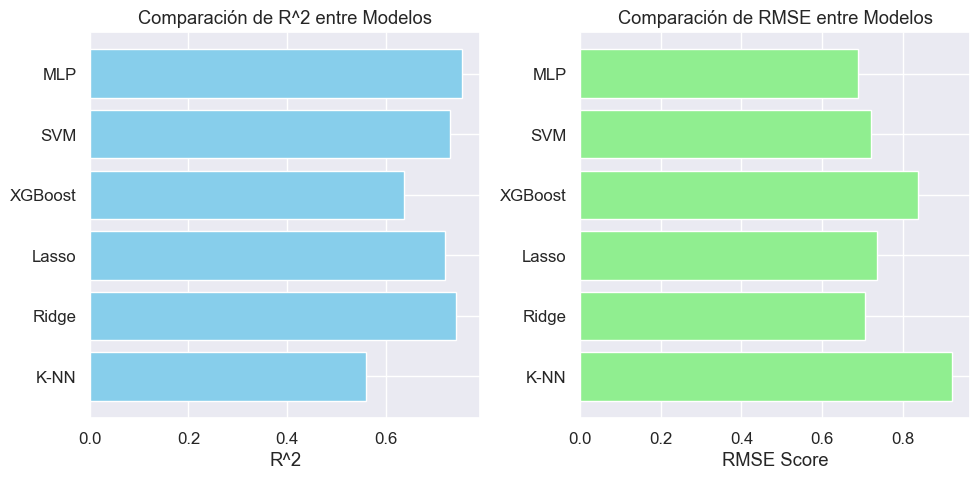

In [35]:
plt.figure(figsize=(10, 5))

# Gráfica de R2
plt.subplot(1, 2, 1)
plt.barh(nombres_modelos, r2_scores, color='skyblue')
plt.xlabel('R^2')
plt.title('Comparación de R^2 entre Modelos')

# Gráfica de RMSE
plt.subplot(1, 2, 2)
plt.barh(nombres_modelos, rmse_scores, color='lightgreen')
plt.xlabel('RMSE Score')
plt.title('Comparación de RMSE entre Modelos')

plt.tight_layout()
plt.show()

## Conclusiones

Basándonos en las métricas obtenidas de cada uno de los modelos, con el fin de predecir la velocidad del viento y con el objetivo de minimizar el RMSE (Error Cuadrático Medio), podemos concluir lo siguiente:

1. El modelo de regresión Ridge tiene el valor más bajo de RMSE (0.705) y el valor más alto de R^2 (0.742), lo que indica que tiene un rendimiento superior en comparación con los otros modelos en términos de precisión y capacidad de explicación de la variabilidad en los datos.

2. El modelo de regresión Lasso también tiene un RMSE bajo (0.734) y un R^2 decente (0.72), lo que lo coloca como una opción viable.

3. El modelo de Support Vector Machine (SVM) tiene un RMSE comparable al de Ridge y Lasso, pero un R^2 ligeramente inferior (0.73), lo que sugiere que podría ser una opción aceptable.

4. El modelo de redes neuronales MLP también muestra un RMSE bajo (0.688) y un buen R^2 (0.754), lo que lo convierte en una opción sólida para la predicción de la velocidad del viento.

5. Los modelos K-NN y XGBoost tienen un RMSE más alto y un R^2 más bajo en comparación con los otros modelos, lo que indica un rendimiento inferior en este contexto.

En resumen, los modelos Ridge, Lasso, SVM y MLP parecen ser las mejores opciones en función de las métricas obtenidas, con el modelo MLP destacando ligeramente por tener el RMSE más bajo y el R^2 más alto.